In [2]:
from google.colab import drive
drive.mount('/content/drive')

file = open('/content/drive/My Drive/Mount.txt', 'r')
mount = file.read()
file.close()

print(mount)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Mount successful!


In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [0]:
# Clear session
from tensorflow.keras import backend as K
K.clear_session()

In [117]:
# создаём список директорий к массивам картинок и словарь меток

from os import listdir, mkdir
from os.path import isfile, isdir, join, exists
import pickle
import random

# ----------------------------------------------
#            ***  DIRECTORY  ***
base_dir = '/content/drive/My Drive/BF_dataset'

basic_stend = '00_Basic_stend'
basic_field = '01_Basic_field'
large_stend = '02_Large_stend'
large_mirror = '03_Large_mirror'
field_full = '04_Field'
field_train = '04_Field_t'
field_validation = '04_Field_v'
field_mirror = '05_Field_mirror'

basic_stend_dir = join(base_dir, basic_stend)
basic_field_dir = join(base_dir, basic_field)
large_stend_dir = join(base_dir, large_stend)
large_mirror_dir = join(base_dir, large_mirror)
field_dir = join(base_dir, field_full)
field_train_dir = join(base_dir, field_train)
field_validation_dir = join(base_dir, field_validation)
field_mirror_dir = join(base_dir, field_mirror)
dir_folder_list = [basic_stend, basic_field, large_stend, large_mirror, field_full, field_train, field_validation, field_mirror]
# ==============================================

# ----------------------------------------------
#           ***  LOAD DATA DICT  ***
file = open(join(basic_stend_dir, '!_basic_stend_boxes_out.p'), 'rb')
basic_dict = pickle.load(file)
file.close()

file = open(join(large_stend_dir, '!_large_stend_boxes_out.p'), 'rb')
large_dict = pickle.load(file)
file.close()

file = open(join(large_mirror_dir, '!_large_stend_boxes_mir.p'), 'rb')
large_mirror_dict = pickle.load(file)
file.close()

file = open(join(field_dir, '!_field_boxes_out.p'), 'rb')
field_dict = pickle.load(file)
file.close()

file = open(join(field_mirror_dir, '!_field_boxes_mir.p'), 'rb')
field_mirror_dict = pickle.load(file)
file.close()
# ==============================================

# ----------------------------------------------
#              ***  CLASSES  ***
classes_list = [dir for dir in listdir(field_dir) if isdir(join(field_dir, dir))]

if '00_m1a2' in classes_list:
    del classes_list[classes_list.index('00_m1a2')]

if '01_type98' in classes_list:
    del classes_list[classes_list.index('01_type98')]

if '02_t90' in classes_list:
    del classes_list[classes_list.index('02_t90')]

if '03_lav25' in classes_list:
    del classes_list[classes_list.index('03_lav25')]

if '04_wz551' in classes_list:
    del classes_list[classes_list.index('04_wz551')]

num_classes = len(classes_list)
print('Classes:', num_classes, classes_list)
# ==============================================

# ----------------------------------------------
#          ***  NUMBER OF IMAGES  ***
dir_folder_list = [field_full]
for dir_folder in dir_folder_list:
    print('\n{}: '.format(dir_folder), end='')
    for class_folder in classes_list:

        current_dir = join(base_dir, dir_folder, class_folder)
        images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))]
        print(len(images_list), end=', ')

    print('\b\b\n\t\t{} x {} = {}\n'.format(num_classes, len(images_list), num_classes * len(images_list)))
# ==============================================

Classes: 6 ['16_havoc', '14_ah1z', '15_z10', '17_uh60', '18_z8', '19_mi17']

04_Field: 1440, 1440, 1440, 1440, 1440, 1440, 
		6 x 1440 = 8640



In [0]:
# crossvalidation 5
#    |     train    |  validation |    train    |
#    |  start - end | start - end | start - end |
# 1) [    0,   1152,  1152,  1440,  None,  None ]
# 2) [    0,    864,   864,  1152,  1152,  1440 ]
# 3) [    0,    576,   576,   864,   864,  1440 ]
# 4) [    0,    288,   288,   576,   576,  1440 ]
# 5) [    0,    288,   288,  1440,  None,  None ]

In [0]:
# compile lists: trai, validation, test
compile_dict = {}
                                # |     train    |  validation |     test    |
                                # |  start - end | start - end | start - end |
compile_dict['00_Basic_stend'] =  [  None,  None,  None,  None,  None,  None ]
compile_dict['01_Basic_field'] =  [  None,  None,  None,  None,  None,  None ]
compile_dict['02_Large_stend'] =  [  None,  None,  None,  None,  None,  None ]
compile_dict['03_Large_mirror'] = [  None,  None,  None,  None,  None,  None ]
compile_dict['04_Field'] =        [   288,  1440,    0,    288,  None,  None ]
compile_dict['05_Field_mirror'] = [  None,  None,  None,  None,  None,  None ] 

In [119]:
random.seed(47)

# ----------------------------------------------
#          ***  LIST OF FOLDERS  ***
train_list = []
train_dict = {}

validation_list = []
validation_dict = {}

test_list = []
test_dict = {}
# ==============================================

# ----------------------------------------------
#          ***  COMPILE LISTS  ***
if True:
    # **********************************************
    # 00_Basic_stend
    if True:
        # ----------------------------------------------
        # Train
        start = compile_dict['00_Basic_stend'][0]
        finish = compile_dict['00_Basic_stend'][1]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(basic_stend_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    train_list.append(join(current_dir, img_name))
                    train_dict[img_name] = field_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Validation
        start = compile_dict['00_Basic_stend'][2]
        finish = compile_dict['00_Basic_stend'][3]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(basic_stend_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    validation_list.append(join(current_dir, img_name))
                    validation_dict[img_name] = field_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Test
        start = compile_dict['00_Basic_stend'][4]
        finish = compile_dict['00_Basic_stend'][5]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(basic_stend_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    test_list.append(join(current_dir, img_name))
                    test_dict[img_name] = field_dict[img_name]
        # ==============================================
    # **********************************************

    # **********************************************
    # 01_Basic_field
    if True:
        # ----------------------------------------------
        # Train
        start = compile_dict['01_Basic_field'][0]
        finish = compile_dict['01_Basic_field'][1]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(basic_field_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    train_list.append(join(current_dir, img_name))
                    train_dict[img_name] = field_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Validation
        start = compile_dict['01_Basic_field'][2]
        finish = compile_dict['01_Basic_field'][3]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(basic_field_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    validation_list.append(join(current_dir, img_name))
                    validation_dict[img_name] = field_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Test
        start = compile_dict['01_Basic_field'][4]
        finish = compile_dict['01_Basic_field'][5]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(basic_field_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    test_list.append(join(current_dir, img_name))
                    test_dict[img_name] = field_dict[img_name]
        # ==============================================
    # **********************************************

    # **********************************************
    # 02_Large_stend
    if True:
        # ----------------------------------------------
        # Train
        start = compile_dict['02_Large_stend'][0]
        finish = compile_dict['02_Large_stend'][1]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(large_stend_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    train_list.append(join(current_dir, img_name))
                    train_dict[img_name] = large_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Validation
        start = compile_dict['02_Large_stend'][2]
        finish = compile_dict['02_Large_stend'][3]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(large_stend_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    validation_list.append(join(current_dir, img_name))
                    validation_dict[img_name] = large_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Test
        start = compile_dict['02_Large_stend'][4]
        finish = compile_dict['02_Large_stend'][5]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(large_stend_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    test_list.append(join(current_dir, img_name))
                    test_dict[img_name] = large_dict[img_name]
        # ==============================================
    # **********************************************

    # **********************************************
    # 03_Large_mirror
    if True:
        # ----------------------------------------------
        # Train
        start = compile_dict['03_Large_mirror'][0]
        finish = compile_dict['03_Large_mirror'][1]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(large_mirror_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    train_list.append(join(current_dir, img_name))
                    train_dict[img_name] = large_mirror_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Validation
        start = compile_dict['03_Large_mirror'][2]
        finish = compile_dict['03_Large_mirror'][3]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(large_mirror_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    validation_list.append(join(current_dir, img_name))
                    validation_dict[img_name] = large_mirror_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Test
        start = compile_dict['03_Large_mirror'][4]
        finish = compile_dict['03_Large_mirror'][5]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(large_mirror_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    test_list.append(join(current_dir, img_name))
                    test_dict[img_name] = large_mirror_dict[img_name]
        # ==============================================
    # **********************************************

    # **********************************************
    # 04_Field
    if True:
        # ----------------------------------------------
        # Train
        start = compile_dict['04_Field'][0]
        finish = compile_dict['04_Field'][1]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(field_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in images_list:
                    train_list.append(join(current_dir, img_name))
                    train_dict[img_name] = field_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Validation
        start = compile_dict['04_Field'][2]
        finish = compile_dict['04_Field'][3]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(field_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in images_list:
                    validation_list.append(join(current_dir, img_name))
                    validation_dict[img_name] = field_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Test
        start = compile_dict['04_Field'][4]
        finish = compile_dict['04_Field'][5]

        if start != None and finish != None:
            print('!!!!!!!!!!!')
            for class_folder in classes_list:
                current_dir = join(field_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in images_list:
                    train_list.append(join(current_dir, img_name))
                    train_dict[img_name] = field_dict[img_name]
        # ==============================================
    # **********************************************

    # **********************************************
    # '05_Field_mirror'
    if True:
        # ----------------------------------------------
        # Train
        start = compile_dict['05_Field_mirror'][0]
        finish = compile_dict['05_Field_mirror'][1]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(field_mirror_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    train_list.append(join(current_dir, img_name))
                    train_dict[img_name] = field_mirror_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Validation
        start = compile_dict['05_Field_mirror'][2]
        finish = compile_dict['05_Field_mirror'][3]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(field_mirror_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    validation_list.append(join(current_dir, img_name))
                    validation_dict[img_name] = field_mirror_dict[img_name]
        # ==============================================

        # ----------------------------------------------
        # Test
        start = compile_dict['05_Field_mirror'][4]
        finish = compile_dict['05_Field_mirror'][5]

        if start != None and finish != None:
            for class_folder in classes_list:
                current_dir = join(field_mirror_dir, class_folder)
                images_list = [f for f in listdir(current_dir) if isfile(join(current_dir, f))][start:finish]

                for img_name in image_list:
                    test_list.append(join(current_dir, img_name))
                    test_dict[img_name] = field_mirror_dict[img_name]
        # ==============================================
    # **********************************************
# **********************************************

if train_list != []:
    random.shuffle(train_list)
    print('\nTrain list: {} / {} = {}'.format(len(train_list), num_classes, len(train_list) / num_classes))
    print('Train dict len', len(list(train_dict)))
    print('Train list:', train_list[:2])

if validation_list != []:
    random.shuffle(validation_list)
    print('\nValidation list: {} / {} = {}'.format(len(validation_list), num_classes, len(validation_list) / num_classes))
    print('Validation dict len', len(list(validation_dict)))
    print('Validation list:', validation_list[:2])

if test_list != []:
    random.shuffle(test_list)
    print('\nTest list: {} / {} = {}'.format(len(test_list), num_classes, len(test_list) / num_classes))
    print('Test dict len', len(list(test_dict)))
    print('Test list:', test_list[:2])


Train list: 6912 / 6 = 1152.0
Train dict len 6912
Train list: ['/content/drive/My Drive/BF_dataset/04_Field/18_z8/f_z8_s_1129.png', '/content/drive/My Drive/BF_dataset/04_Field/16_havoc/f_havoc_s_0940.png']

Validation list: 1728 / 6 = 288.0
Validation dict len 1728
Validation list: ['/content/drive/My Drive/BF_dataset/04_Field/15_z10/f_z10_s_0578.png', '/content/drive/My Drive/BF_dataset/04_Field/18_z8/f_z8_s_0467.png']


In [120]:
print(len(train_list))
# print(len(test_list))

# train_list.extend(test_list)
# print(len(train_list))
print(len(validation_list))
# print(len(validation_list) + len(train_list))

# train_dict = dict(list(train_dict).extend(list(test_dict)))

6912
1728


In [121]:
from random import randrange

batch_size = 32

train_steps_per_epoch = len(train_list)/batch_size
validation_steps_per_epoch = len(validation_list)/batch_size
# test_steps_per_epoch = len(test_list)/batch_size

print('Train: steps per epoch', train_steps_per_epoch)
print('Validation: steps per epoch', validation_steps_per_epoch)
# print('Test: steps per epoch', test_steps_per_epoch)

if type(train_steps_per_epoch) == 'int':
    add_to_train = []
    add_train = batch_size - len(train_list) % batch_size

    for i in range(add_train):
        add_to_train.append(train_list[randrange(len(train_list))])
        print(add_to_train[i])
        train_list.append(train_list[randrange(len(train_list))])
        
    add_to_validation = []
    add_validation = batch_size - len(validation_list) % batch_size

    for i in range(add_validation):
        add_to_validation.append(validation_list[randrange(len(validation_list))])
        print(add_to_validation[i])
        validation_list.append(validation_list[randrange(len(validation_list))])

train_steps_per_epoch = len(train_list)/batch_size
validation_steps_per_epoch = len(validation_list)/batch_size

print('Train: steps per epoch', train_steps_per_epoch)
print('Validation: steps per epoch', validation_steps_per_epoch)

Train: steps per epoch 216.0
Validation: steps per epoch 54.0
Train: steps per epoch 216.0
Validation: steps per epoch 54.0


In [0]:
# Save lists
models_dir = join(base_dir, 'models')

with open(join(models_dir, 'external_stop_training.txt'), 'w') as file:
    file.write('0')

save_prefix = 'field_std'

# train list
file = open(join(models_dir, save_prefix + '_train_list_cross_05.p'), 'wb')
pickle.dump(train_list, file)
file.close()

# train dict
file = open(join(models_dir, save_prefix + '_train_dict_cross_05.p'), 'wb')
pickle.dump(train_dict, file)
file.close()

# train list
file = open(join(models_dir, save_prefix + '_validation_list_cross_05.p'), 'wb')
pickle.dump(validation_list, file)
file.close()

# train dict
file = open(join(models_dir, save_prefix + '_validation_dict_cross_05.p'), 'wb')
pickle.dump(validation_dict, file)
file.close()

In [123]:
# Standart conv

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras import optimizers

from tensorflow.keras.models import load_model
model = load_model(join(models_dir, 'model_heli6_clear.h5'))

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 416, 416, 3)]     0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 416, 416, 3)       12        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 414, 414, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 207, 207, 32)      0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 207, 207, 32)      128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 205, 205, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 102, 102, 64)      0   

In [0]:
from tensorflow.keras.callbacks import Callback

# custom call back: external stop
class ExternalStop(Callback):
    def __init__(self, stop_flag_path):
        self.stop_flag = stop_flag_path

    def on_epoch_end(self):
        with open(stop_flag_path, 'r') as file:
            if int(file.readline()) == 1:
                print('External stop training')
                self.model.stop_training = True

In [0]:
# custom generator

from tensorflow.keras.utils import to_categorical
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.backend import resize_images
import numpy as np

class DataGenerator(keras.utils.Sequence):
    '''Genarates data for keras'''
    def __init__(self, list_ids, labels, batch_size=20, dim = (416, 416), n_channels = 3, n_classes = 6, shuffle = True):
        self.list_ids = list_ids
        self.batch_size = batch_size
        self.labels = labels
        self.dim = dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        # self.open_image

    def __len__(self):
        '''Denotes the number of batches per epoch'''
        return int(np.floor(len(self.list_ids) / self.batch_size))

    def __getitem__(self, index):
        '''Generate one batch of data'''
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of ids
        list_ids_temp = [self.list_ids[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_ids_temp)

        return X, y

    def on_epoch_end(self):
        '''Updates indexes after each epoch'''
        self.indexes = np.arange(len(self.list_ids))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_ids_temp):
        '''Generate data containing batch_size samples'''
        # X: shape (n_samples, *dim, n_channels)

        def open_image(image_path):
            image = load_img(image_path) # target_size=(224, 224)
            image = img_to_array(image)
            # image = np.expand_dims(image, 0)
            # image = resize_images(image, 224, 224, 'channels_last')
            image = image.astype('float32')
            image /= 255.0
            return image

        # Initialization

        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, id in enumerate(list_ids_temp):

            # Store sample
            X[i,] = open_image(id)

            image_name = id.split('/')[-1]

            # Store class
            
            y[i] = self.labels[image_name][0][0] - 14

        return X, to_categorical(y, num_classes=self.n_classes)

In [126]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras import optimizers
from os import listdir, mkdir
from os.path import isfile, isdir, join, exists
import datetime
import math
import time

def seconds_to_m_s(seconds):
    minutes = math.floor(seconds // 60)
    seconds = math.ceil(seconds % 60)
    return minutes, seconds

start_work = time.time()

logs_dir = join(base_dir, 'logs')
models_dir = join(base_dir, 'models')

checkpoint_filepath = join(models_dir, 'heli6_point_{epoch:02d}_{val_accuracy:.4f}.hdf5')

now_log_dir = join(logs_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

if not exists(now_log_dir):
    mkdir(now_log_dir)

# Parameters
params = {'dim': (416, 416),
          'batch_size': 32,
          'n_classes': 6,
          'n_channels': 3,
          'shuffle': True}

train_generator = DataGenerator(train_list, train_dict, **params)
validation_generator = DataGenerator(validation_list, validation_dict, **params)

# model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
#               loss='categorical_crossentropy',
#               metrics=['acc'])

# ExternalStop(join(logs_dir, 'external_stop_training.txt'))
# ModelCheckpoint(checkpoint_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', save_freq='epoch')]

callback = [TensorBoard(now_log_dir, histogram_freq=1), 
            EarlyStopping(monitor='val_acc', patience=3), 
            ModelCheckpoint(filepath=join(base_dir, 'model_heli6_cross_5_best.h5'), monitor='val_loss', save_best_only=True)]

            

history = model.fit(train_generator,
                    steps_per_epoch=train_steps_per_epoch,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=validation_steps_per_epoch,
                    callbacks=callback)

end_work = time.time()
work_time = seconds_to_m_s(end_work - start_work)
print("\nAll work took {} minutes {} seconds".format(work_time[0], work_time[1]))

Epoch 1/30
216/216 [==============================] - 93s 430ms/step - loss: 0.4119 - acc: 0.8569 - val_loss: 0.7395 - val_acc: 0.7060
Epoch 2/30
216/216 [==============================] - 93s 431ms/step - loss: 0.3779 - acc: 0.8777 - val_loss: 0.7349 - val_acc: 0.6968
Epoch 3/30
216/216 [==============================] - 92s 424ms/step - loss: 0.3567 - acc: 0.8796 - val_loss: 0.7400 - val_acc: 0.6991
Epoch 4/30
216/216 [==============================] - 93s 430ms/step - loss: 0.3316 - acc: 0.8931 - val_loss: 0.7303 - val_acc: 0.6991

All work took 6 minutes 14 seconds


In [0]:
model.save('model_heli6_cross_5.h5')

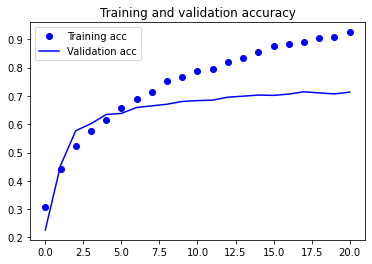

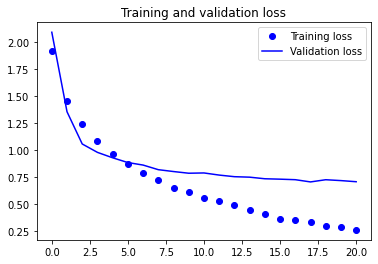

In [88]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(validation_generator, steps=80)
print('test acc:', test_acc)

80/80 [==============================] - 16s 195ms/step - loss: 0.5408 - acc: 0.7850
test acc: 0.7850000262260437


In [0]:
print(now_log_dir)

In [0]:
%tensorboard --logdir '/content/drive/My Drive/Tanks_416/logs/20200509-071648'

In [102]:
file = open(join(models_dir, 'field_std_train_list_cross_01.p'), 'rb')
cross_list_1 = pickle.load(file)
file.close()

file = open(join(models_dir, 'field_std_train_list_cross_02.p'), 'rb')
cross_list_2 = pickle.load(file)
file.close()

file = open(join(models_dir, 'field_std_train_list_cross_03.p'), 'rb')
cross_list_3 = pickle.load(file)
file.close()

file = open(join(models_dir, 'field_std_train_list_cross_04.p'), 'rb')
cross_list_4 = pickle.load(file)
file.close()

cross_1_2 = list(set(cross_list_1) & set(cross_list_2))
print(len(cross_1_2))

cross_2_3 = list(set(cross_list_2) & set(cross_list_3))
print(len(cross_2_3))

cross_1_3 = list(set(cross_list_1) & set(cross_list_3))
print(len(cross_1_3))

cross_1_4 = list(set(cross_list_1) & set(cross_list_4))
print(len(cross_1_4))

cross_2_4 = list(set(cross_list_2) & set(cross_list_4))
print(len(cross_2_4))

5184
5184
5184
5184
5184
